In [14]:
import matplotlib.pyplot as plt
from sportsipy.nfl.teams import Teams
import pandas as pd
import seaborn as sns
from sportsipy.nfl.schedule import Schedule
import matplotlib.animation as anim
from matplotlib.animation import FuncAnimation
import inspect
import collections
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [15]:
points_dict = {"Team" : []}
for team in Teams("2022"):
        points_dict["Team"].append(team.abbreviation)
#returns the sum points for all weeks prior
def sumpoints(team, week):
    sum_pf = 0
    sum_pa = 0
    if week == 1:
        return (0, 0)
    else: 
        index = points_dict["Team"].index(team)
        sum_pf = points_dict["points" + str(week - 1)][index][0] * (week - 1)
        sum_pa = points_dict["points" + str(week - 1)][index][1] * (week - 1)
        return (sum_pf, sum_pa)
#each change the upper limit of the range to one plus the week that just completed
for i in range(1, 6):
    points_dict.update({"points" + str(i) : []})
    for team in Teams("2022"):
        points_dict["points" + str(i)].append(((((Schedule(team.abbreviation)[i - 1].points_scored + sumpoints(team.abbreviation, i)[0]) / i),
                                               ((Schedule(team.abbreviation)[i - 1].points_allowed + sumpoints(team.abbreviation, i)[1]) / i))))

In [16]:
d3 = {"Team" : []}
for team in Teams("2022"):
    d3["Team"].append(team.abbreviation)
#change upper limit to 15 * ((week number just completed * 2) - 1)
for i in range(1, 135):
    d3.update({str(i) : []})
    for team in Teams("2022"):
        index = points_dict["Team"].index(team.abbreviation)
        if (int(i / 15) % 2 == 0):
            d3[str(i)].append((points_dict["points" + str(int(i / 30) + 1)][index][0], points_dict["points" + str(int(i / 30) + 1)][index][1]))
          
        else:
            pointsfor_increment = ((points_dict["points" + str(int(i / 30) + 2)][index][0] -
                               (points_dict["points" + str(int(i / 30) + 1)][index][0])) *
                            0.06666666 * (i % 15)) + points_dict["points" + str(int(i / 30) + 1)][index][0]
            pointsagainst_increment = ((points_dict["points" + str(int(i / 30) + 2)][index][1] -
                               (points_dict["points" + str(int(i / 30) + 1)][index][1])) *
                            0.06666666 * (i % 15)) + points_dict["points" + str(int(i / 30) + 1)][index][1]
            d3[str(i)].append((pointsfor_increment, pointsagainst_increment))

MovieWriter ffmpeg unavailable; using Pillow instead.


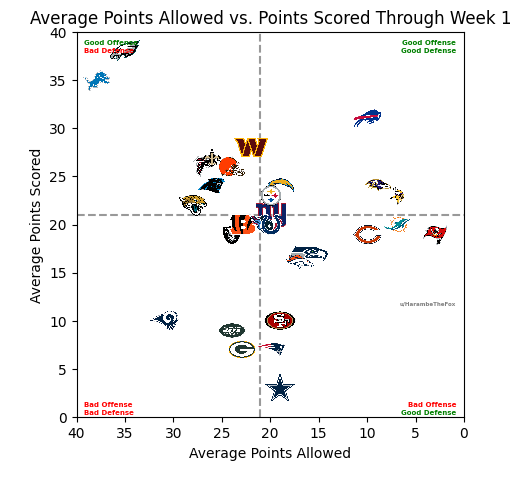

In [19]:
#first we get the points to move staticly from one place to the next
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

def animate(i):
    ax.clear()
    for j in range(0,32):
        point = d3[str(i + 1)][j]
        ax.plot(point[0], point[1])
        img = plt.imread(points_dict["Team"][j] + ".png")
        imagebox = OffsetImage(img, zoom = 0.03)
        ab = AnnotationBbox(imagebox, [point[1], point[0]], frameon = False)
        ax.add_artist(ab)
    ax.set_xlim((40, 0))
    ax.set_ylim((0, 40))
    ax.set_title("Average Points Allowed vs. Points Scored Through Week " + str(int(i / 30) + 1))
    ax.set_xlabel("Average Points Allowed")
    ax.set_ylabel("Average Points Scored")
    ax.text(0.02, 0.98, "Good Offense", horizontalalignment = "left", verticalalignment = "top"
             , size = 5, color = "green", weight = "semibold", transform = ax.transAxes)
    ax.text(0.02, 0.96, "Bad Defense", horizontalalignment = "left", verticalalignment = "top"
             , size = 5, color = "red", weight = "semibold", transform = ax.transAxes)
    ax.text(0.98, 0.98, "Good Offense", horizontalalignment = "right", verticalalignment = "top"
             , size = 5, color = "green", weight = "semibold", transform = ax.transAxes)
    ax.text(0.98, 0.96, "Good Defense", horizontalalignment = "right", verticalalignment = "top"
             , size = 5, color = "green", weight = "semibold", transform = ax.transAxes)
    ax.text(0.02, 0.02, "Bad Defense", horizontalalignment = "left", verticalalignment = "top"
             , size = 5, color = "red", weight = "semibold", transform = ax.transAxes)
    ax.text(0.02, 0.04, "Bad Offense", horizontalalignment = "left", verticalalignment = "top"
             , size = 5, color = "red", weight = "semibold", transform = ax.transAxes)
    ax.text(0.98, 0.02, "Good Defense", horizontalalignment = "right", verticalalignment = "top"
             , size = 5, color = "green", weight = "semibold", transform = ax.transAxes)
    ax.text(0.98, 0.04, "Bad Offense", horizontalalignment = "right", verticalalignment = "top"
             , size = 5, color = "red", weight = "semibold", transform = ax.transAxes)
    ax.text(0.98, 0.30, "u/HarambeTheFox", horizontalalignment = "right", verticalalignment = "top", size = 4, color = "gray",
             weight = "semibold", transform = ax.transAxes)
    if((int(i / 15) % 2) == 0):
        avg = 0
        for score in points_dict["points" + str(int((int(i / 15) / 2) + 1))]:
            avg += score[0] / 32
        ax.axhline(y = avg, ls = "--", color = "gray", alpha = 0.8)
        ax.axvline(x = avg, ls = "--", color = "gray", alpha = 0.8)
ani = FuncAnimation(fig, animate, frames = len(d3) - 1, interval = 90, repeat = True)
ani.save("Average Points Allowed vs Points Scored Through Week 5 Animation.gif", dpi = 500)